# Toronto Crime Rates Analysis

# Part 3: Toronto's Neighbourhood Crime Rates Analysed & Mapped



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import folium

from folium.plugins import HeatMap, MarkerCluster

# 1. Loading the Dataset

Fortunetly, Toronto Police Service provide a public safety data portal which contains a number of useful crime data sets. From here, I seleted the "MCI 2014 to 2018" spreadsheet which includes all Major Crime Indicators (MCI) 2014 to 2018 occurrences by reported date and related offences: http://data.torontopolice.on.ca/datasets/mci-2014-to-2018

Upon downloading this file, I did some preprocessing and loaded the file.

In [2]:
toronto_crime = pd.read_csv('./Toronto_MCI.csv')

In [3]:
toronto_crime.occurrenceyear.unique()

array([2014., 2015., 2016., 2017., 2018.,   nan])

# 2. Data Cleaning and Preparation

#### Checking for NaN Values
- Although these were removed during the preprocessing of the data, I wanted to ensure none were loaded during the loading process


In [4]:
nan_df = toronto_crime[toronto_crime.isnull().any(axis=1)]
nan_df[:]

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
166500,GO-2015643612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166501,GO-2015641587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166502,GO-2015657994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166503,GO-2015669925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166504,GO-2015515110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167520,GO-2018885860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167521,GO-2018939395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167522,GO-2018940481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167523,GO-2018940756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
toronto_crime = toronto_crime.dropna(how='any')


In [6]:
nan_df = toronto_crime[toronto_crime.isnull().any(axis=1)]
nan_df

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long


#### Change the columns to the appropriate data types

In [7]:
toronto_crime.dtypes

event_unique_id         object
occurrencedate          object
premisetype             object
offence                 object
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour         float64
MCI                     object
Neighbourhood           object
Lat                    float64
Long                   float64
dtype: object

##### Based on this, the only change I needed to make was on the occurrencedata column.

In [8]:
toronto_crime['occurrencedate'] = pd.to_datetime(toronto_crime['occurrencedate'])

In [9]:
toronto_crime.dtypes

event_unique_id                     object
occurrencedate         datetime64[ns, UTC]
premisetype                         object
offence                             object
occurrenceyear                     float64
occurrencemonth                     object
occurrenceday                      float64
occurrencedayofyear                float64
occurrencedayofweek                 object
occurrencehour                     float64
MCI                                 object
Neighbourhood                       object
Lat                                float64
Long                               float64
dtype: object

#  3. Analysis



## Neighbourhood Crime Rates
- create DF containing neighbourhoods, MCI, year, Lat, Long

In [10]:
toronto_crime.head()

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
0,GO-20149004286,2014-06-20 10:55:00+00:00,Apartment,Theft Over,2014.0,June,20.0,171.0,Friday,10.0,Theft Over,Bay Street Corridor (76),43.659229,-79.385193
1,GO-20142411379,2014-07-02 00:20:00+00:00,Outside,Pointing A Firearm,2014.0,July,2.0,183.0,Wednesday,0.0,Assault,Newtonbrook West (36),43.777592,-79.425400
2,GO-20142411379,2014-07-02 00:20:00+00:00,Outside,Robbery With Weapon,2014.0,July,2.0,183.0,Wednesday,0.0,Robbery,Newtonbrook West (36),43.777592,-79.425400
3,GO-20142412127,2014-07-02 01:30:00+00:00,House,B&E,2014.0,July,2.0,183.0,Wednesday,1.0,Break and Enter,Malvern (132),43.801727,-79.210373
4,GO-20142417548,2014-07-02 20:52:00+00:00,Commercial,Assault,2014.0,July,2.0,183.0,Wednesday,20.0,Assault,Milliken (130),43.835884,-79.254334


In [11]:
neighbourhood_df = toronto_crime[['Neighbourhood', 'MCI','offence', 'occurrenceyear','Lat','Long']]

In [12]:
neighbourhood_df.head()

,Neighbourhood,MCI,offence,occurrenceyear,Lat,Long
0,Bay Street Corridor (76),Theft Over,Theft Over,2014.0,43.659229,-79.385193
1,Newtonbrook West (36),Assault,Pointing A Firearm,2014.0,43.777592,-79.425400
2,Newtonbrook West (36),Robbery,Robbery With Weapon,2014.0,43.777592,-79.425400
3,Malvern (132),Break and Enter,B&E,2014.0,43.801727,-79.210373
4,Milliken (130),Assault,Assault,2014.0,43.835884,-79.254334


In [13]:
neighbourhood_df_grouped = neighbourhood_df.groupby('Neighbourhood').count()['offence'] 

In [14]:
neighbourhood_df_top_20 = neighbourhood_df[:20] 

In [15]:
neighbourhood_df_sorted = neighbourhood_df_grouped.sort_values(ascending=False)

In [16]:
neighbourhood_crime = neighbourhood_df_sorted.to_frame().reset_index()

In [17]:
neighbourhood_crime.columns=['Neighbourhood', 'Offence Count']

In [18]:
top_20 = neighbourhood_crime[:20]
top_20

,Neighbourhood,Offence Count
0,Church-Yonge Corridor (75),6284
1,Waterfront Communities-The Island (77),5637
2,West Humber-Clairville (1),4317
3,Moss Park (73),3591
4,Bay Street Corridor (76),3552
5,Kensington-Chinatown (78),3252
6,Woburn (137),3143
7,York University Heights (27),3118
8,Downsview-Roding-CFB (26),2955
9,Annex (95),2895


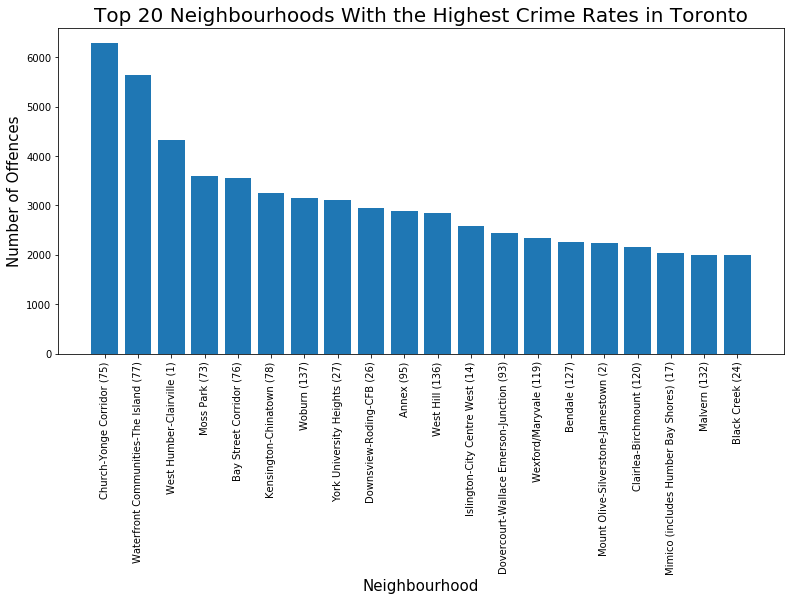

In [19]:
#Plot top 20 neighbourhoods
width = 13
height = 6
plt.figure(figsize=(width, height))

neighbourhoods = top_20['Neighbourhood']
offence_count = top_20['Offence Count']

plt.bar(neighbourhoods, offence_count)

plt.ylabel('Number of Offences', fontsize=15)
plt.xlabel('Neighbourhood', fontsize=15)
plt.xticks(rotation=90)

plt.title('Top 20 Neighbourhoods With the Highest Crime Rates in Toronto',fontsize = 20)
plt.show()

## Toronto Crime Mapped

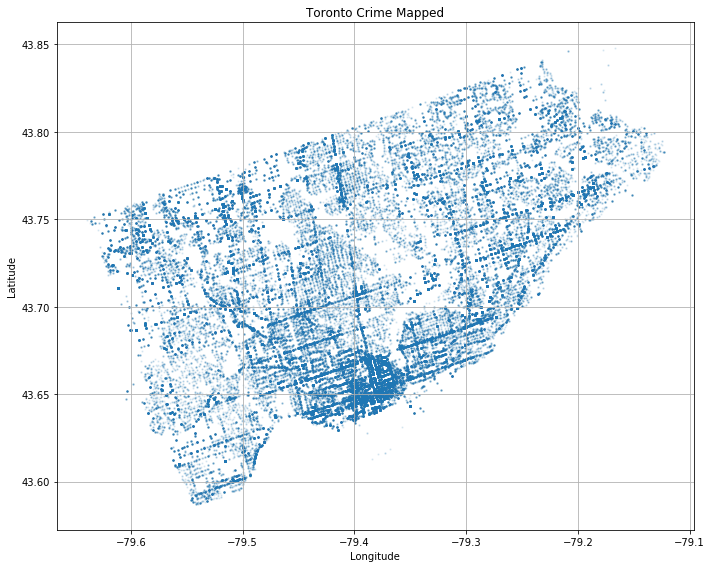

In [20]:
#Can easily map the crimes using the co-ordinates provided by the public data portel

width = 10
height = 8
plt.figure(figsize=(width, height))

plt.scatter("Long", "Lat", data = toronto_crime, alpha = 0.1, c = 'C0',edgecolor = 'face', s=1.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto Crime Mapped')

plt.grid()
plt.tight_layout()
plt.axis('tight')

plt.show()

### Folium Mapping

In [21]:
#Create a DF that contains the coordinates and number of offences per neighbourhood
map_crime_toronto = neighbourhood_df[['Neighbourhood','Lat','Long','offence']]
map_crime_toronto_count = map_crime_toronto.groupby('Neighbourhood')[['offence']].count().sort_values(by=['offence'])

In [22]:
#create another df but set the index as the neighbourhood so we can join this df with the one above
#that way the lat and long match accordingly
map_toronto_folium = map_crime_toronto[['Neighbourhood','Lat','Long']].drop_duplicates('Neighbourhood').set_index('Neighbourhood')

In [23]:
map_toronto_folium = map_toronto_folium.join(map_crime_toronto_count, how='inner')


In [24]:
map_toronto_folium.sort_values(by='offence',ascending=False)

,Lat,Long,offence
Neighbourhood,,,
Church-Yonge Corridor (75),43.649132,-79.372192,6284
Waterfront Communities-The Island (77),43.638840,-79.400650,5637
West Humber-Clairville (1),43.732254,-79.618439,4317
Moss Park (73),43.653381,-79.369148,3591
Bay Street Corridor (76),43.659229,-79.385193,3552
...,...,...,...
Broadview North (57),43.685982,-79.356293,299
Markland Wood (12),43.633289,-79.566757,292
Yonge-St.Clair (97),43.696976,-79.404060,234


In [26]:
#Folium Mapping
toronto = (43.702270, -79.366074)

  
# create empty map zoomed in on Toronto
map = folium.Map(location=toronto, zoom_start=12)

cluster = MarkerCluster().add_to(map)
 
#Step 2: Clusters breaking into Markers
for x in map_toronto_folium.iterrows():
    folium.Marker([x[1].Lat, x[1].Long]).add_to(cluster)
    
#Step 3: Heat
max_crime = map_toronto_folium['offence'].max() # max value as reference for the darkets shade

heat = HeatMap(map_toronto_folium.values,
            min_opacity=0.2,
            max_val=max_crime,
            radius=30, blur=20, 
            max_zoom=11)

heat.add_to(map)

map